# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

# **Introducción al Aprendizaje Automático**

## Entregable Laboratorio Nº 1

## GRUPO Nº24

## INTEGRANTES:
   - Clarisa Manzone
   - Nico Rosales
   - Daniel Rubio
   - Diana Fonnegra   
   ------


# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [516]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [517]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\Users\danie\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [518]:
#print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
#boston['feature_names']  # nombres de los atributos para cada columna de 'data'
#boston['filename']         # Nombre del archivo csv asociado en la instancia de relevamiento
#boston['data_module']


In [519]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [520]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

## Respuesta Ejercicio 1:

### 1.1 ¿De qué se trata el conjunto de datos?

La información es importada desde la libreria **sklearn** tomando uno de los datasets que la misma ofrece para la realización de  estudios relacionados. Se trata en este caso del **"Boston house prices"**.

El dataset en su conjunto es de tipo diccionario, permitiendo acceder mediante claves especificas a:
* La descripcion del dataset.
* Los atributos o features relevados para cada muestra.
* El valor de la propiedad correspondiente a cada muetra.
* Otros datos complementarios del dataset.



### 1.2 ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo es el precio de casas en Boston, (medida en unidades de $1000). 
Como significado tendremos una estimación del **precio** poblacional medio **de una casa** en Boston **ocupadas por sus dueños**. Se estimula el modelo con nuevas features que respeten la distribucion de las utilizadas para el correspondiente cálculo. En definitiva asumiendo que la muestra es representativa de la problación.

### 1.3 ¿Qué información (atributos) hay disponibles para hacer la predicción?
Los atributos disponibles son:

* CRIM: tasa de criminalidad per cápita por ciudad
* ZN: Proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
* INDUS: Proporción de acres comerciales no minoristas por ciudad
* CHAS: Variable ficticia Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
* NOX: Concentración de óxidos nítricos (partes por 10 millones)
* RM: promedio de cuartos por vivienda
* AGE: proporción de unidades ocupadas por propietarios construidas antes de 1940
* DIS: Distancias ponderadas  a cinco centros de empleo de Boston
* RAD: Índice de accesibilidad a carreteras radiales
* TAX: Tasa de impuesto a la propiedad de valor total por cada $10,000
* PTRATIO: ratio alumno-profesor por municipio
* B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
* LSTAT: % estado inferior de la población
         

### 1.4 ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?

Podemos aventurar algunas hipotesis:

Estrato social:
* CRIM: tasa de criminalidad per cápita por ciudad
* LSTAT: % estado inferior de la población
* PTRATIO: ratio alumno-profesor por municipio
* B: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

Localización:
* DIS: Distancias ponderadas  a cinco centros de empleo de Boston
* RAD: Índice de accesibilidad a carreteras radiales
* CHAS: Variable ficticia Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
    
Caracteristica de la vivienda:
* RM: promedio de cuartos por vivienda
* AGE: proporción de unidades ocupadas por propietarios construidas antes de 1940
* TAX: Tasa de impuesto a la propiedad de valor total por cada $10,000



### 1.5 ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

Durante la carga de los datos, la libreria Sklearn emite un aviso donde se manifiesta que los mismos tienen un problema ético.
Existe un sesgo racial presente en la estructura de datos. Esto puede traer problemas de diversas índoles. Modelar la raza va impactar en la potencialidad de venta de cara al mercado, ej: al relevar este atributo durante el muestreo.

Sklearn indica explicitamente que los datos solo deben ser usados a fines educativos y educar sobre aspectos eticos.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

In [521]:
my_cols=3
my_rows=(len(boston['feature_names']) // my_cols) + 1
max_subplots= my_cols * my_rows
print(f"Filas:{my_rows}; Columnas:{my_cols};  size:{max_subplots} ")


Filas:5; Columnas:3;  size:15 


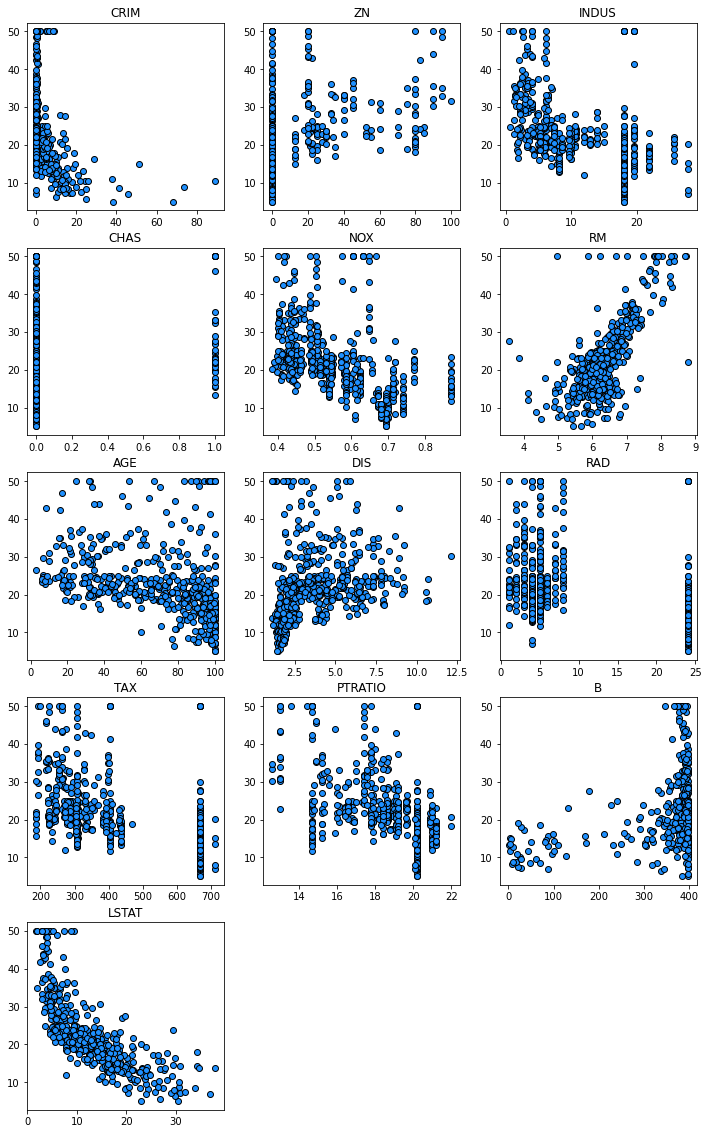

In [522]:

fig, axs = plt.subplots(nrows = my_rows, ncols = my_cols, sharex=False, sharey = False,figsize=(12,20))
for indice, feature in enumerate(boston['feature_names'],start=1):
    selector = boston['feature_names'] == feature
    the_row= (indice-1) // my_cols
    the_colum= (indice-1) % my_cols
    axs[the_row, the_colum].scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k")
    axs[the_row, the_colum].set_title(feature)

for indice in range(len(boston['feature_names']), max_subplots):   

    fig.delaxes(axs.flatten()[indice])    
# axs[-1, -1].axis('off')
# axs[-1, -2].axis('off')

**Consideraciones:**

Las siguientes variables son de especial interes. No debemos descartar el resto en esta etapa.
La correlacion expuesta a nivel cualititativo por inspección grafica las destaca sobre el resto.
* CRIM: tasa de criminalidad per cápita por ciudad
* RM: promedio de cuartos por vivienda
* EGE: proporción de unidades ocupadas por propietarios construidas antes de 1940
* DIS: Distancias ponderadas  a cinco centros de empleo de Boston
* RAD: Índice de accesibilidad a carreteras radiales
* LSTAT: % estado inferior de la población


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

## Respuesta Ejercicio 3

### 3.1 Para el estudio  se selecciona la variable *AGE* (Antiguedad de la casa) 

In [523]:
#Filtrado del atributo para el estudio
feature = 'AGE'  # selecciono el atributo 'AGE'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

### 3.2 Instancia y entrenamiento

In [524]:
# Instancia y entrenamiento.

# X_train matriz con todos los atributos ----> X_train_f vector con uno solo atributo a estrudiar; asociado a y_train.
# X_test matriz con todos los atributos ----> X_test_f vector con uno solo atributo a estrudiar, y_test.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

degree = 1
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)
model.fit(X_train_f, y_train);

In [525]:
# Predicción y evaluación.
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

### 3.3 Calculo del error cuadrático medio para los conjuntos de entrenamiento y evaluación.

In [526]:
# Calculo de errores
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {round(train_error,2)}')
print(f'Test error: {round(val_error,2)}')

Train error: 70.6
Test error: 80.39


#### Como es lógico el error es mayor para los datos de prueba que para el conjunto de entrenamiento.

### 3.4 Representación gráfica del modelo resultante en conjunto con los puntos de entrenamiento y evaluación.

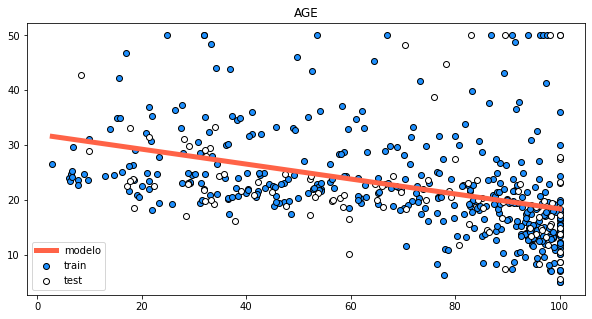

In [527]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.figure(figsize=(10,5))
plt.plot(x, model.predict(x), color="tomato", label="modelo", linewidth=5)

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()



#### Queda planteado el modelo de regesión lineal. Se calcula el error tanto para la serie de entrenamiento como para la de prueba. Queda por analizar las potenciales mejoras en los respectivos errores con el aumento del grado del polinomio.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

## Respuesta Ejercicio 4

### 4.1 Se estudian poliniomios hasta grado 20, instanciando y entrenando cada modelo. Se calculan los erroes imprimiendo y almancenando los mismos en una lista.

In [528]:
import numpy as np

# Continuamos trabajando con el atributo "AGE"

lista_errores=[]
for degree in range (1,21):
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # Predicción y evaluación.
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # Calculo de errores
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_test_pred)
    print(f"º Pol={degree} -->", f'Train_err={round(train_error,2)}',
          f'Test_err={round(val_error,2)}')
    lista_errores.append([degree, train_error,val_error ])


º Pol=1 --> Train_err=70.6 Test_err=80.39
º Pol=2 --> Train_err=68.6 Test_err=83.74
º Pol=3 --> Train_err=68.6 Test_err=83.48
º Pol=4 --> Train_err=68.31 Test_err=83.63
º Pol=5 --> Train_err=68.31 Test_err=83.72
º Pol=6 --> Train_err=68.11 Test_err=85.24
º Pol=7 --> Train_err=67.84 Test_err=87.07
º Pol=8 --> Train_err=72.59 Test_err=93.67
º Pol=9 --> Train_err=81.11 Test_err=105.01
º Pol=10 --> Train_err=131.63 Test_err=135.57
º Pol=11 --> Train_err=152.86 Test_err=157.39
º Pol=12 --> Train_err=172.8 Test_err=185.66
º Pol=13 --> Train_err=191.4 Test_err=214.29
º Pol=14 --> Train_err=208.56 Test_err=237.59
º Pol=15 --> Train_err=224.29 Test_err=253.49
º Pol=16 --> Train_err=238.76 Test_err=263.33
º Pol=17 --> Train_err=252.2 Test_err=268.49
º Pol=18 --> Train_err=264.83 Test_err=271.7
º Pol=19 --> Train_err=319.91 Test_err=286.72
º Pol=20 --> Train_err=328.8 Test_err=293.31


### 4.2. Grafico de las curvas de error en términos del grado del polinomio.

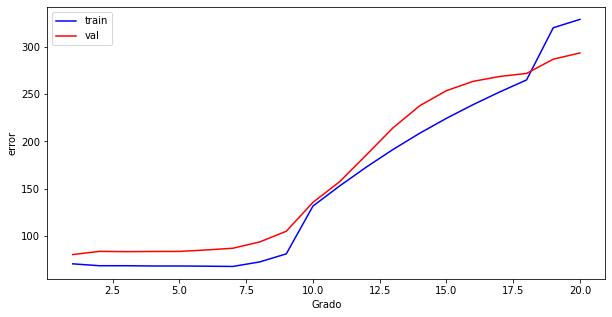

In [529]:

lista_errores=np.array(lista_errores)
plt.figure(figsize=(10,5))
plt.plot(lista_errores[:,0], lista_errores[:,1], color="blue", label="train")
plt.plot(lista_errores[:,0], lista_errores[:,2], color="red", label="val")
plt.legend()
plt.xlabel("Grado")
plt.ylabel("error")
plt.show()

#### Se puede ver que el error de entrenamiento baja de forma consistente hasta el grado 7. El error de prueba se mantiene constante tambien hasta el grado 7. Luego para el grado ocho en adelante se produce un sobre ajuste tal que ambos errores comienzan a subir progresicamente con el grado del polinomio.


### 4.4 Se elije el grado 7 como propuesta de modelo que mejor desempeño ofrece. Se grafica a continuación

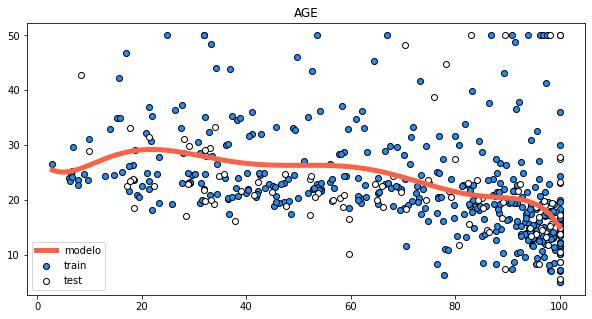

In [530]:
degree = 7
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)
model.fit(X_train_f, y_train);

x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(10,5))
plt.plot(x, model.predict(x), color="tomato", label="modelo", linewidth=5)
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

### 4.4 Comentarios finales.

#### El el regresor propuesto modela cualitativamente bien la distribución de los datos definiendo una traza "que se adaptada" a la representancion de los puntos de entrenamiento y prueba.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

## Respuesta Ejercicio 5

### 5.1 Elegimos los atributos RM, AGE y LSTAT

In [531]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'AGE') | \
                                                            (boston['feature_names'] == 'LSTAT')

### 5.2 Realizamos el etrenamiento y evaluacion del modelo para distintos grados.

In [532]:
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [533]:
lista_errores=[]
for degree in range (1,11):
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train);
    
    # Predicción y evaluación.
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # Calculo de errores
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_test_pred)
    print(f"º Pol={degree} -->", f'Train_err={round(train_error,2)}',
          f'Test_err={round(val_error,2)}')
    lista_errores.append([degree, train_error,val_error ])

º Pol=1 --> Train_err=35.73 Test_err=44.77
º Pol=2 --> Train_err=23.65 Test_err=33.85
º Pol=3 --> Train_err=21.17 Test_err=33.65
º Pol=4 --> Train_err=19.27 Test_err=43.38
º Pol=5 --> Train_err=18.56 Test_err=4008.46
º Pol=6 --> Train_err=17.26 Test_err=201906.97
º Pol=7 --> Train_err=15.9 Test_err=7509159513.45
º Pol=8 --> Train_err=4341.77 Test_err=11823402973698.1
º Pol=9 --> Train_err=5922.24 Test_err=1992704028626386.0
º Pol=10 --> Train_err=8379.81 Test_err=7.852791675199461e+16


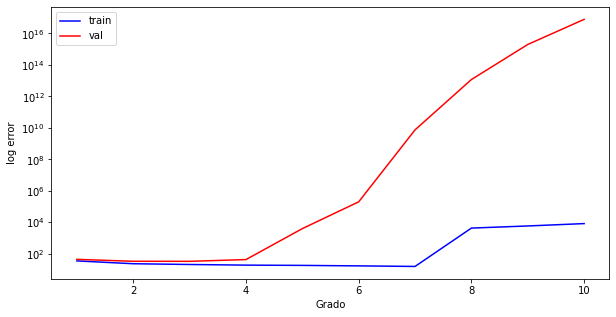

In [534]:
lista_errores=np.array(lista_errores)
plt.figure(figsize=(10,5))
plt.plot(lista_errores[:,0], lista_errores[:,1], color="blue", label="train")
plt.plot(lista_errores[:,0], lista_errores[:,2], color="red", label="val")
plt.yscale('log')
plt.xlabel("Grado")
plt.ylabel("log error")
plt.legend()
plt.show()

### 5.3 Interpretación y comparación de resultados ¿Se obtuvieron mejores modelos? ¿Porqué?:
#### Notamos que para los primeros grados de polinomios el error de entrenamiento es menor que cuando utilizamos una sola variable. En principio, ocurre lo mismo con error de prueba. Es llamativo con grados mayores, al presentarse sobreajuste observar como se dispara  la magnitud del error de prueba. 
#### Elegimos la solución obtenida con grado 3, como una propuesta de buena perfomance.
#### El modelo obentido nos ofrece ún error de entrenamiento y prueba menor a los previos estudiados. 
#### Esto se debe al aumento en la cantidad de caracteristicas que participan del entrenamiento. 

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

In [535]:
# Tomamos todas las features
X_train_full = X_train
X_test_full = X_test
X_train_full.shape, X_test_full.shape

((404, 13), (102, 13))

In [536]:
# Analizamos en forma iterativa los distinto modelos  con un grado de polinomio creciente
# en el rango 1..10

lista_errores=[]
for degree in range (1,7):
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
    model = make_pipeline(pf, lr)
    model.fit(X_train_full, y_train);
    
    # Predicción y evaluación.
    y_train_pred = model.predict(X_train_full)
    y_test_pred = model.predict(X_test_full)
    
    # Calculo de errores
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_test_pred)
    print(f"º Pol={degree} -->", f'Train_err={round(train_error,2)}',
          f'Test_err={round(val_error,2)}')
    lista_errores.append([degree, train_error,val_error ])

º Pol=1 --> Train_err=19.33 Test_err=33.45
º Pol=2 --> Train_err=4.34 Test_err=31.28
º Pol=3 --> Train_err=0.0 Test_err=976575.65
º Pol=4 --> Train_err=0.0 Test_err=950756.91
º Pol=5 --> Train_err=0.0 Test_err=195453.64
º Pol=6 --> Train_err=0.0 Test_err=200691.24


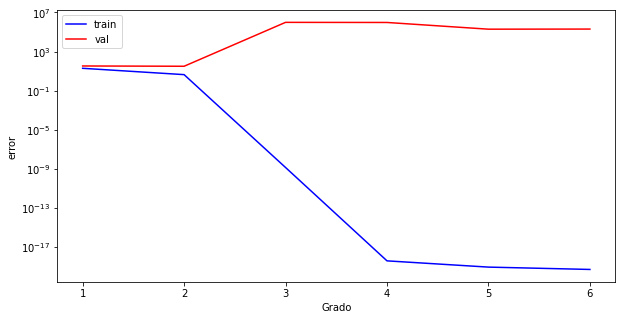

In [537]:
lista_errores=np.array(lista_errores)
plt.figure(figsize=(10,5))
plt.plot(lista_errores[:,0], lista_errores[:,1], color="blue", label="train")
plt.plot(lista_errores[:,0], lista_errores[:,2], color="red", label="val")
plt.legend()
plt.yscale('log')
plt.xlabel("Grado")
plt.ylabel("error")
plt.show()

#### Notamos que para los primeros grados de polinomios el error de entrenamiento y prueba es pequeño, grado 1 y 2.
#### Destacamos que con grados mayores a 2 el error de entrenamiento se hace cero evidenciandose un sobreajuste al crecer significativamente la magnitud del error de prueba. 
#### Elegimos la solución obtenida con grado 2, como una propuesta de buena perfomance. La misma  ofrece ún error de entrenamiento y prueba menor a los previos estudiados. Esto se debe a que se utlizaron el **Total de caracteristicas disponibles** para entrenar el modelo.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [538]:
from sklearn.linear_model import Ridge

feature="AGE"
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == feature)

X_train_ridge = X_train[:, selector]
X_test_ridge = X_test[:, selector]
X_train_ridge.shape, X_test_ridge.shape


((404, 1), (102, 1))

### 7.1 Planteamos el estudio de un polinomio de grado 10, en un rango amplio de alpha.

C:\Users\danie\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.91725e-41): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\danie\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.15556e-41): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\danie\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.23209e-41): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\danie\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=8.72148e-41): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\dan

º Pol=10 --> Alpha=10.0 Train_err=67.45 Test_err=88.07
º Pol=10 --> Alpha=17.0 Train_err=67.45 Test_err=88.07
º Pol=10 --> Alpha=28.0 Train_err=67.45 Test_err=88.07
º Pol=10 --> Alpha=46.0 Train_err=67.45 Test_err=88.08
º Pol=10 --> Alpha=77.0 Train_err=67.45 Test_err=88.09
º Pol=10 --> Alpha=129.0 Train_err=67.45 Test_err=88.11
º Pol=10 --> Alpha=215.0 Train_err=67.45 Test_err=88.14
º Pol=10 --> Alpha=359.0 Train_err=67.45 Test_err=88.16
º Pol=10 --> Alpha=599.0 Train_err=67.45 Test_err=88.19
º Pol=10 --> Alpha=1000.0 Train_err=67.46 Test_err=88.22


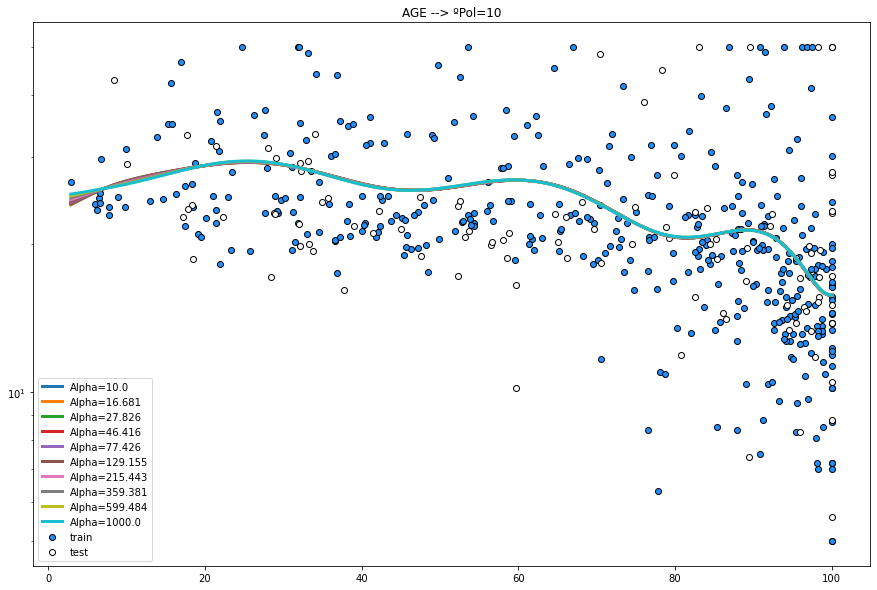

In [539]:
degree = 10
lista_parameters=[]
alphas = np.logspace(1, 3, 10)

plt.figure(figsize=(15,10))

plt.scatter(X_train_ridge, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_ridge, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(f"{feature} --> ºPol={degree}")
x_start = min(np.min(X_train_ridge), np.min(X_test_ridge))
x_end = max(np.max(X_train_ridge), np.max(X_test_ridge))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)


for alpha_test in alphas:
    pf = PolynomialFeatures(degree);
    lr = Ridge();
    lr.set_params(alpha=alpha_test);
    #lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr);
    model.fit(X_train_ridge, y_train);

    # Predicción y evaluación.
    y_train_pred_ridge = model.predict(X_train_ridge);
    y_test_pred_ridge = model.predict(X_test_ridge);


    plt.plot(x, model.predict(x), label=f"Alpha={round(alpha_test,3)}", linewidth=3)

    # Calculo de errores
    train_error = mean_squared_error(y_train, y_train_pred_ridge);
    val_error = mean_squared_error(y_test, y_test_pred_ridge);
    print(f"º Pol={degree} -->",  f"Alpha={round(alpha_test,0)}", f'Train_err={round(train_error,2)}',
          f'Test_err={round(val_error,2)}')
    lr.coef_[0]=lr.intercept_
    lista_parameters.append(np.concatenate(([degree, alpha_test,train_error,val_error], lr.coef_), axis=None))

plt.legend()
plt.yscale('log')
plt.show()


### 7.2 Planteamos el estudio de un polinomio de grado 15, buscando un rango de alpha procedente

º Pol=15 --> Alpha=100000000.0 Train_err=598.81 Test_err=560.12
º Pol=15 --> Alpha=166810054.0 Train_err=464.68 Test_err=417.76
º Pol=15 --> Alpha=278255940.0 Train_err=377.05 Test_err=327.84
º Pol=15 --> Alpha=464158883.0 Train_err=307.95 Test_err=260.01
º Pol=15 --> Alpha=774263683.0 Train_err=246.42 Test_err=203.54
º Pol=15 --> Alpha=1291549665.0 Train_err=194.23 Test_err=161.95
º Pol=15 --> Alpha=2154434690.0 Train_err=162.34 Test_err=148.32
º Pol=15 --> Alpha=3593813664.0 Train_err=162.05 Test_err=174.36
º Pol=15 --> Alpha=5994842503.0 Train_err=193.72 Test_err=237.52
º Pol=15 --> Alpha=10000000000.0 Train_err=244.61 Test_err=319.9


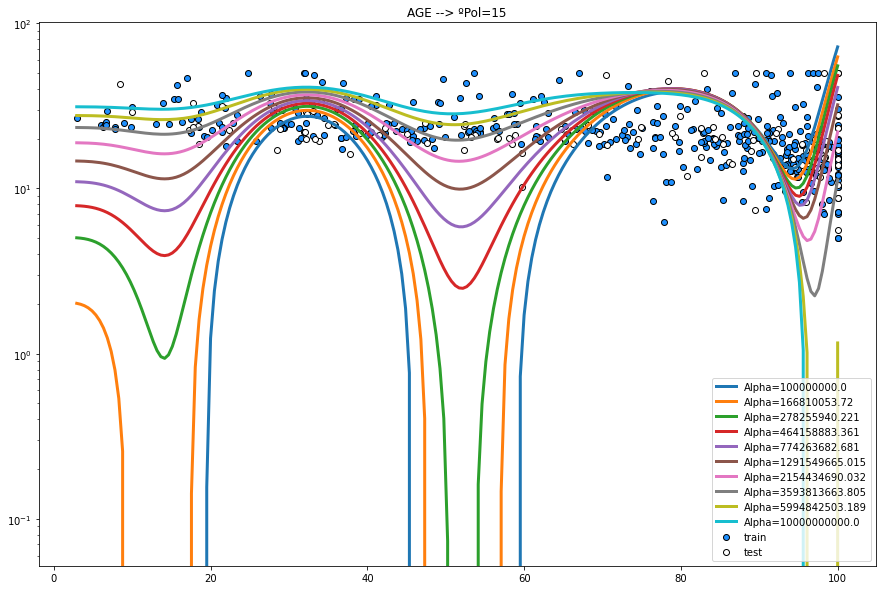

In [540]:
degree = 15
lista_parameters=[]
alphas = np.logspace(8, 10, 10)

plt.figure(figsize=(15,10))

plt.scatter(X_train_ridge, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_ridge, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(f"{feature} --> ºPol={degree}")
x_start = min(np.min(X_train_ridge), np.min(X_test_ridge))
x_end = max(np.max(X_train_ridge), np.max(X_test_ridge))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)


for alpha_test in alphas:
    pf = PolynomialFeatures(degree);
    lr = Ridge();
    lr.set_params(alpha=alpha_test);
    #lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr);
    model.fit(X_train_ridge, y_train);

    # Predicción y evaluación.
    y_train_pred_ridge = model.predict(X_train_ridge);
    y_test_pred_ridge = model.predict(X_test_ridge);


    plt.plot(x, model.predict(x), label=f"Alpha={round(alpha_test,3)}", linewidth=3)

    # Calculo de errores
    train_error = mean_squared_error(y_train, y_train_pred_ridge);
    val_error = mean_squared_error(y_test, y_test_pred_ridge);
    print(f"º Pol={degree} -->",  f"Alpha={round(alpha_test,0)}", f'Train_err={round(train_error,2)}',
          f'Test_err={round(val_error,2)}')
    lr.coef_[0]=lr.intercept_
    lista_parameters.append(np.concatenate(([degree, alpha_test,train_error,val_error], lr.coef_), axis=None))

plt.legend()
plt.yscale('log')
plt.show()

# 7.3 Consideraciones: 
#### Punto 7.1 Para un polinomio de grado diez se obserba que en el rango de alpha aplicado para la regresion Ridge el error de predicción y prueba mejora siginificativamente en comparación a la regresión polinomial simple.
#### Punto 7.2 Aun en el caso de proponer un polinomio de grado quince, existen valores de alpha que ofrecen errores de predicción y prueba con mejor desempeño que el logrado con la regresión polinomial simple.
